<span style="font-family:'Times New Roman', Times, serif; font-size:16px;">

## Question 1

## TO-DOs
- [x] Organize the data in a manageable way
- [] Add the Spread between Corporate and 10yrs Treasury
- [] Descriptive Statistics
- [] 

In [2]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="font-family:'Times New Roman', Times, serif; font-size:16px;">

### Data Description

| Category          | Variable | 
|--------------------|-----------|
| **Equity Index**   | S&P 500 | 
| **Government Yield** | US Treasury (10-year constant maturity) |
| **Corporate Yield** | ICE BofA US Corporate Index | 
| **Commodity**       | Crude Oil WTI (CL1 Quote) |
| **Forex Rate**      | EUR/USD |


In [29]:
# data import
equity_idx = pd.read_excel('data/SPX Index.xlsx', header=5, usecols=[4, 5], index_col=0, names=['date', 'SPX'])
commodity = pd.read_excel('data/CL1 Comdty.xlsx', header=5, usecols=[5, 6], index_col=0, names=['date', 'Oil WTI'])
fx_rate = pd.read_excel('data/EURUSD.xlsx', header=1, usecols=[15, 16], index_col=0, names=['date', 'EURUSD'])
gvt_yield = pd.read_excel('data/DGS10.xlsx', sheet_name='Daily', header=0, index_col=0, names=['date', '10yr Tr. Yield'])
corporate_yield = pd.read_excel('data/BAMLC0A0CMEY.xlsx', sheet_name='Daily, Close', header=0, index_col=0, names=['date', 'US Yields'])


<span style="font-family:'Times New Roman', Times, serif; font-size:16px;">

## Data Aggregation
In the following block of code we are going to aggregate the data into 4 DataFrames:

1. df_level : containing a raw aggregation of the data
2. df_log : containing the log-levels (for Fixed Income Sec. we performed a conversion of the Yield | compound → continuous)
3. df_log_diff : containing log-differences
4. df : comprehensive DataFrame built via an inner join of the former three.

In [32]:
# Raw Levels aggregation 
df_level = pd.concat([equity_idx, gvt_yield, corporate_yield, commodity, fx_rate], join='inner', axis=1)
df_level = df_level.dropna(axis=0)

# Log-Levels
log_eq_idx = np.log(equity_idx)
log_commodity = np.log(commodity)
log_fx = np.log(fx_rate)
log_gvt = np.log(1 + (gvt_yield / 100))
log_corp = np.log(1 + (corporate_yield / 100))

# Log Dataframe
df_log = pd.concat([log_eq_idx, log_commodity, log_fx, log_gvt, log_corp], join='inner', axis=1).dropna(axis=0)
df_log.columns = [f'log {equity_idx.columns[0]}',
                f'log {commodity.columns[0]}',
                f'log {fx_rate.columns[0]}',
                f'log {gvt_yield.columns[0]}',
                f'log {corporate_yield.columns[0]}']

# Log-Differences Dataframe
df_log_diff = df_log.diff().dropna(axis=0)
df_log_diff.columns = [f'logDiff {equity_idx.columns[0]}',
                f'logDiff {commodity.columns[0]}',
                f'logDiff {fx_rate.columns[0]}',
                f'logDiff {gvt_yield.columns[0]}',
                f'logDiff {corporate_yield.columns[0]}']

# Comprehensive Dataframe
df = pd.concat([df_level, df_log, df_log_diff], join='inner', axis=1).dropna(axis=0)

/opt/anaconda3/envs/ml/lib/python3.11/site-packages/pandas/core/internals/blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


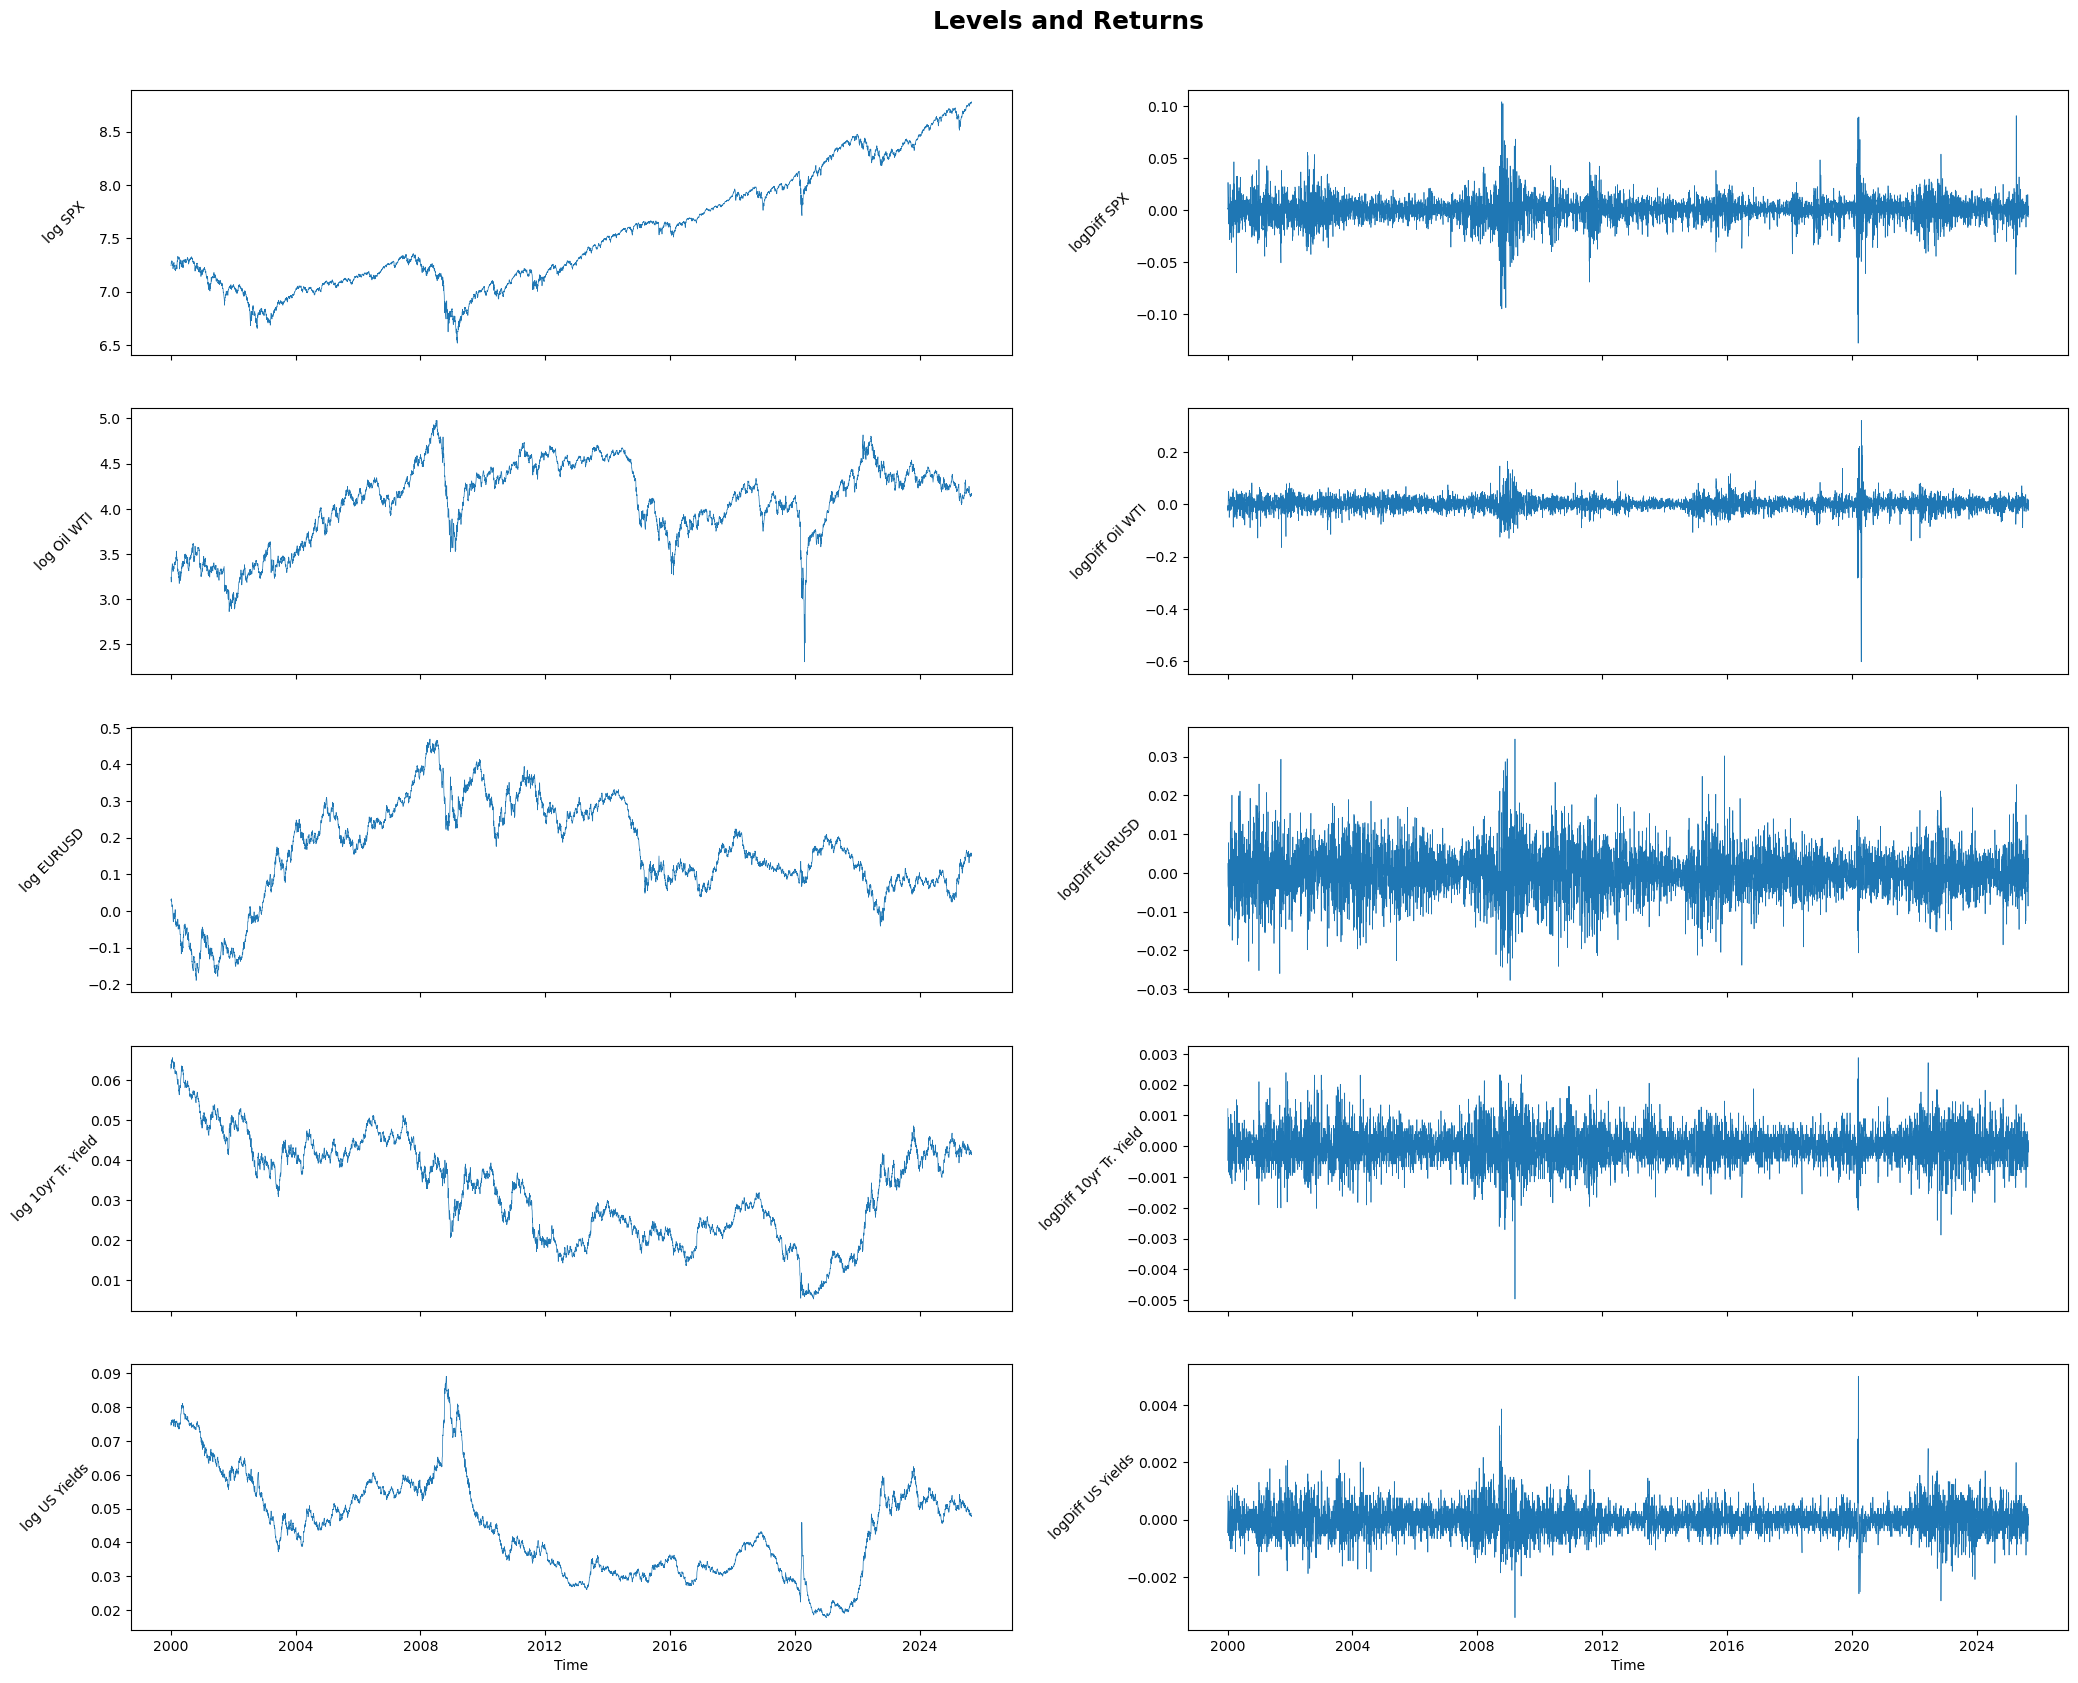

In [33]:
# Plot
names0 = df_log.columns.to_list()                                                       # Subplots names Col 0
names1 = df_log_diff.columns.to_list()                                                  # ' ' ' ' ' ' '  Col 1
nrows = 5                                               
ncols = 2
lw = .5
fig, axs = plt.subplots(nrows, ncols, sharex=True, figsize=(25, 20))                    # Plot Settings
plt.suptitle('Levels and Returns', y=0.92, fontsize=18, fontweight='bold')              # Plot Title
axs[-1, 0].set_xlabel('Time')                                                           # Plot common X-axis name
axs[-1, 1].set_xlabel('Time')                                                           # Plot common X-axis name

column = 0                                                                              # Index for plotting each column
for i in range(nrows):
    axs[i, 0].plot(df_log.index, df_log.iloc[:, column], linewidth=lw)                  # first-column subplot (Level)
    axs[i, 0].set_ylabel(f'{names0[column]}', rotation=45, labelpad=25, va='center')    # first subplot Y Label

    axs[i, 1].plot(df_log_diff.index, df_log_diff.iloc[:, column], linewidth=lw)        # second-column plot (Return)
    axs[i, 1].set_ylabel(f'{names1[column]}', rotation=45, labelpad=25, va='center')    # second subplot Y Label
    
    column += 1
plt.show()

In [ ]:
returns_df = df.copy()
returns_df = df.drop(['SPX', '10yr Tr. Yield', 'US Corp Yields', ])
descriptive_stats = df.describe()
k_moments = pd.DataFrame()
for i in names_col:
    k_moments[i] = [df[i]]
# descriptive_stats = pd.concat([descriptive_stats, skew.T, kurtosis.T], axis=0)

,date,SPX,log SPX,10yr Tr. Yield,10yr Tr. return,US Corp Yields,US Corp return,Crude Oil WTI,log Crude Oil WTI,EURUSD,log EURUSD,spread,spread return
count,6438,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000
mean,2012-11-07 00:47:51.947810048,2212.221376,0.000234,3.307801,-0.000351,4.556440,-0.000614,63.867414,0.000227,1.187846,0.000032,1.248639,-0.000104
min,2000-01-05 00:00:00,676.530000,-0.127652,0.520000,-0.510000,1.790000,-0.370000,12.340000,-0.282206,0.827200,-0.025218,0.120000,-0.350000
25%,2006-06-19 06:00:00,1207.365000,-0.004787,2.230000,-0.030000,3.272500,-0.030000,44.662500,-0.012827,1.088425,-0.003351,0.850000,-0.010000
50%,2012-11-07 12:00:00,1515.805000,0.000622,3.380000,0.000000,4.500000,0.000000,63.285000,0.001071,1.177250,0.000074,1.100000,0.000000
75%,2019-04-02 18:00:00,2845.730000,0.005914,4.300000,0.030000,5.607500,0.030000,81.670000,0.013593,1.304775,0.003384,1.450000,0.010000
max,2025-08-29 00:00:00,6501.860000,0.109572,6.790000,0.290000,9.320000,0.520000,145.290000,0.319634,1.599100,0.034506,5.930000,0.420000
std,NaN,1370.734922,0.012252,1.298000,0.058044,1.528736,0.051250,25.020650,0.025907,0.155110,0.005877,0.792928,0.030629


In [101]:
description

,SPX,log SPX,10yr Tr. Yield,10yr Tr. return,US Corp Yields,US Corp return,Crude Oil WTI,log Crude Oil WTI,EURUSD,log EURUSD,spread,spread return
count,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000,6438.000000
mean,2212.221376,0.000234,3.307801,-0.000351,4.556440,-0.000614,63.867414,0.000227,1.187846,0.000032,1.248639,-0.000104
std,1370.734922,0.012252,1.298000,0.058044,1.528736,0.051250,25.020650,0.025907,0.155110,0.005877,0.792928,0.030629
min,676.530000,-0.127652,0.520000,-0.510000,1.790000,-0.370000,12.340000,-0.282206,0.827200,-0.025218,0.120000,-0.350000
25%,1207.365000,-0.004787,2.230000,-0.030000,3.272500,-0.030000,44.662500,-0.012827,1.088425,-0.003351,0.850000,-0.010000
50%,1515.805000,0.000622,3.380000,0.000000,4.500000,0.000000,63.285000,0.001071,1.177250,0.000074,1.100000,0.000000
75%,2845.730000,0.005914,4.300000,0.030000,5.607500,0.030000,81.670000,0.013593,1.304775,0.003384,1.450000,0.010000
max,6501.860000,0.109572,6.790000,0.290000,9.320000,0.520000,145.290000,0.319634,1.599100,0.034506,5.930000,0.420000


In [4]:
df.corr()

,date,SPX,log SPX,10yr Tr. Yield,10yr Tr. return,US Corp Yields,US Corp return,Crude Oil WTI,log Crude Oil WTI,EURUSD,log EURUSD,spread,spread return
date,1.000000,0.866950,0.022576,-0.571944,0.019026,-0.529828,0.017829,0.374420,-0.003473,-0.033808,-0.009713,-0.085232,-0.005396
SPX,0.866950,1.000000,0.025109,-0.200534,0.021435,-0.248845,0.019651,0.187846,0.002443,-0.293296,-0.006743,-0.151495,-0.007638
log SPX,0.022576,0.025109,1.000000,-0.016637,0.291519,-0.024549,0.140828,0.002382,0.214003,0.013090,0.114071,-0.020096,-0.318193
10yr Tr. Yield,-0.571944,-0.200534,-0.016637,1.000000,0.011486,0.854987,0.017366,-0.231881,-0.003210,-0.237778,0.005616,0.011413,0.004509
10yr Tr. return,0.019026,0.021435,0.291519,0.011486,1.000000,-0.001778,0.850891,0.020606,0.163725,-0.003240,-0.132106,-0.022229,-0.468420
US Corp Yields,-0.529828,-0.248845,-0.024549,0.854987,-0.001778,1.000000,0.008906,-0.220132,-0.013226,-0.196168,0.003246,0.528373,0.014112
US Corp return,0.017829,0.019651,0.140828,0.017366,0.850891,0.008906,1.000000,0.041951,0.067387,-0.000988,-0.190644,-0.011258,0.060142
Crude Oil WTI,0.374420,0.187846,0.002382,-0.231881,0.020606,-0.220132,0.041951,1.000000,0.015339,0.645664,-0.015104,-0.044825,0.032614
log Crude Oil WTI,-0.003473,0.002443,0.214003,-0.003210,0.163725,-0.013226,0.067387,0.015339,1.000000,0.009193,0.119981,-0.020245,-0.196401
EURUSD,-0.033808,-0.293296,0.013090,-0.237778,-0.003240,-0.196168,-0.000988,0.645664,0.009193,1.000000,0.020919,0.011031,0.004042


,SPX
date,
2000-01-03,7.282912
2000-01-04,7.243813
2000-01-05,7.245734
2000-01-06,7.246689
2000-01-07,7.273419
...,...
2025-08-25,8.770178
2025-08-26,8.774304
2025-08-27,8.776692
